In [1]:
import h5py
import numpy as np
from numpy import array, exp
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from scipy.signal import argrelmax
from scipy.optimize import curve_fit
import scipy
from scipy import stats
import time
import glob
import tables as tb
from scipy.signal import find_peaks
import spectroscopy_update as spec

In [2]:
# Define simple linear function to relate ADC Channel values to energy

def linear(x, m, b):
    return m*x + b

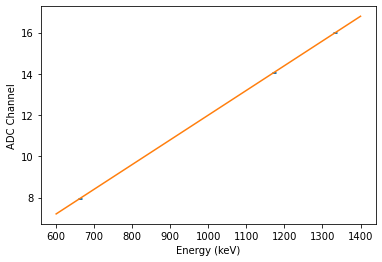

In [3]:
## Input peak energies of the isotopes being analyzed
energies = [661.7, 1173.237, 1332.501]

# Input the peak values determined by the gaussian fits from the individual analysis notebooks
peaks = [7.94689, 14.072089, 15.9869311]

# Input the FWHMs from the gaussian fits from the individual analysis notebooks
FWHMs = [0.046836, 0.0488077, 0.0546773]

FWHMs = np.array(FWHMs)
popt, pcov = curve_fit(linear, xdata=energies, ydata=peaks, sigma=FWHMs/2.355, p0=[100/600, 7000], maxfev=10000)

xspace = np.linspace(600, 1400, 1000)
plt.errorbar(energies, peaks, yerr=FWHMs/2.355, capsize=2, ls='None', label='Data')
plt.plot(xspace, linear(xspace, *popt), label='Linear Fit')
plt.xlabel('Energy (keV)')
plt.ylabel('ADC Channel')
plt.show()
plt.close()

In [4]:
# invert to get E = m*ADC + b
mcal = 1/popt[0]
bcal = -popt[1]/popt[0]

def lincal(data):
    return mcal*data + bcal

# Here are the m and b valus from y = mx+b that make up the detector calibration
print(mcal, bcal)

83.45811475307565 -1.471560372327043


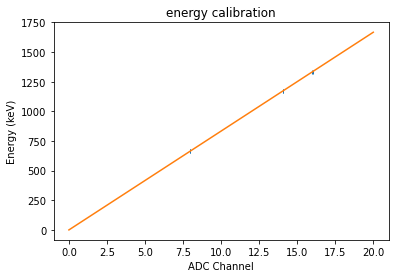

In [8]:
# This is the same graph as above, I just like ADC on the x-axis and energy on the y-axis

plt.errorbar(peaks, energies, xerr=FWHMs/2.355, capsize=2, ls='None', label='Data')
xspace = np.linspace(0, 20, 100)
plt.plot(xspace, lincal(xspace), label='Linear Fit')
plt.xlabel('ADC Channel')
plt.ylabel('Energy (keV)')
plt.title('energy calibration')
plt.show()
plt.close()

In [9]:
# Here we calculate the FWHMs, and energy resolution of the calibrations, both in keV and %

e1 = lincal(peaks - FWHMs/2)
print(e1)
e2 = lincal(peaks + FWHMs/2)
print(e2)
FWHMs_keV = (e2 - e1)

print("FWHM in keV and % for 662, 1173, and 1333 keV:")
with np.printoptions(precision=3):
    print(FWHMs_keV, 'keV')
    print(100*FWHMs_keV/energies, '%')

[ 659.80647505 1170.92175889 1330.48593773]
[ 663.71531931 1174.99515752 1335.04920211]
FWHM in keV and % for 662, 1173, and 1333 keV:
[3.909 4.073 4.563] keV
[0.591 0.347 0.342] %
